<a id='top'></a>
# Group Project
## Table of Contents

[Initial Imports](#initial)

[Correlation](#correlation)

[Correlation Heatmap](#heatmap)
    
[Data Spreads](#spreads)

### Results Section
[Regression Results](#results)

[Diversity Information By Country](#countries)

[Quota Countries with datapoint counts](#quota_countries)

[Table: Board diversity by country and year](#countries_tbl)

[Table: Board diversity by country and year for quota countries](#quota_country_div)

[Graphs for countries with quotas for publicly traded firms](#quota_graphs)

[Graph: Norway](#norway)

[Graph: Spain](#spain)

[Graph: France](#france)

[Graph: Israel](#israel)

[Graph: Belgium](#belgium)

<a id="initial"></a>
### `Initial imports and parameter setting`

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels
from IPython.display import Image, display
from IPython.core.display import HTML 
import seaborn as sns

%matplotlib inline

print('Python version: ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
#print('Scikit-Learn version: ' + sklearn.__version__)
print('Interpreter path: ' + sys.executable)
print('Statsmodel version: ' + statsmodels.__version__)
print('Seaborn version: ' + sns.__version__)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)


Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.23.0
Matplotlib version: 2.2.2
Interpreter path: C:\ProgramData\Anaconda3\python.exe
Statsmodel version: 0.9.0
Seaborn version: 0.8.1


### `Read in the data sheet`

In [2]:
df_main = pd.read_excel('CG_dataset_with_correl_region_err.xlsx', sheet_name='Data')

### `These are the numeric headers in the data file. These are used to run the correlation.`

In [3]:
numeric_hdrs = [
    'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'QUOTA_SOE', 'QUOTA_PASSAGE_YEAR', 'QUOTA_COMPLIANCE_YEAR',
    'bsize', 'mbsize', 'sbsize', 'edirs', 'nedirs', 'idirs', '%brd_indp', 'bind', 'lstruc', 
    'ceooutside', 'nomcom', 'nomcomind', 'nomcomchart', 'nomcomsize', 'nomcommeet', 'femnom', 
    'meetatt', 'leaddir', 'boardmeet', 'mboardmeet', 'sboardmeet', 'femboard', 'femmboard',
    'femsboard', 'femceo', 'femchair', 'ceoage', 'ceoten', 'cgcomm', 'hrcomm', 'execcomm', 
    'investcomm', 'csrcomm', 'fincomm', 'execmmem', 'disclcoe', 'cgdiscl', 'audcomm', 'audcommind',
    'audcommmeet', 'finexp', 'audcommchart', 'audcommsize', 'femaud', 'audfees', 'aud2fees', 
    'taxfees', 'othfees', 'totfees', 'big4', 'compcomm', 'compcommind', 'compcommchar', 'compcommsize',
    'compcommmeet', 'femcomp', 'bown1st', 'bown1stper', 'mown1st', 'mown1stper', 'neown1st', 
    'neown1stper', 'indown1st', 'indown1stper', 'ceoown1st', 'ceoown1stper', 'eblock1st',
    'eblock1stper', 'iiown1st', 'iiown1stper', 'emown1st', 'emown1stper', 'misc1st', 'misc1stper',
    'state1st', 'state1stper', 'wheld1st', 'wheld1stper', 'largest1st', 'largest1stper', 'top51st',
    'top51stper', 'large1st', 'ff_sales', 'ff_oper_inc', 'assets', 'ff_assets_intl', 'ff_emp_num',
    'ff_rd_exp', 'R&D_INTENSITY', 'ff_roe', 'familyfirm', 'ffdef2', 'ffdef3', 'ffdef4', 'ffdef5',
    'ffdef6', 'ffdef7', 'ffdef8', 'ffdef9', 'ffdef10', 'ffdef11', 'ffdef12', 'ffdef13', 'ffdef14',
    'ffdef15', 'ffdef17', 'ffdef18', 'ffdef19', 'ffunlist', 'ffident', 'ffmgt', 'ceohired', 'ceofounder',
    'ceodescend', 'chairfounder', 'chairdescend', 'chairoutside', 'chairceohire', 'chairceofounder', 
    'chairceodescend', 'ffpercent', 'dualclass_ff', 'descendboard', 'desendmgt', 'founderboard', 
    'nffpercent', 'lonefounder', 'fflargest', 'fflargestmgt', 'mltpbh', 'wedge', 'FamilyBoardMembers'
]

# These are the focused headers referring to the categories we're interested in only.
interested_hdrs = [
    'bsize', 'mbsize', 'sbsize', 'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'femnom', 'femboard', 'femmboard', 
    'femsboard', 'femceo', 'femchair', 'femaud', 'femcomp', 'FEM_DIV'
]

<a id='correlation'></a>
## Correlation matrix
[Return to Table of Contents](#top)

In [4]:
#df_numerics = df_main[numeric_hdrs].copy()
df_numerics = df_main[interested_hdrs].copy()

df_corr = df_numerics.corr(method='pearson')
# df_corr.to_excel('correlation.xlsx')
df_corr

,bsize,mbsize,sbsize,HAS_QUOTA,QUOTA_PCNT,QUOTA_PTF,femnom,femboard,femmboard,femsboard,femceo,femchair,femaud,femcomp,FEM_DIV
bsize,1.000000,NaN,NaN,0.009027,0.006032,0.032946,0.198321,0.302967,NaN,NaN,-0.000241,-0.005402,0.154593,0.146521,0.014553
mbsize,NaN,1.000000,0.254328,0.102510,0.102284,-0.130213,-0.015709,NaN,0.453862,0.064622,-0.025763,-0.008799,0.000390,-0.029612,NaN
sbsize,NaN,0.254328,1.000000,0.014306,0.013535,0.096514,0.025837,NaN,0.039748,0.508002,-0.036454,-0.034004,0.107084,0.056751,NaN
HAS_QUOTA,0.009027,0.102510,0.014306,1.000000,0.995527,0.811862,0.023057,0.207455,0.205893,0.315310,-0.017802,0.010039,0.106237,0.065261,0.239931
QUOTA_PCNT,0.006032,0.102284,0.013535,0.995527,1.000000,0.830013,0.023400,0.210661,0.205996,0.315449,-0.019805,0.010790,0.110445,0.068843,0.245888
QUOTA_PTF,0.032946,-0.130213,0.096514,0.811862,0.830013,1.000000,0.027712,0.197221,-0.030654,0.327394,-0.020662,0.010094,0.080964,0.058685,0.218238
femnom,0.198321,-0.015709,0.025837,0.023057,0.023400,0.027712,1.000000,0.616622,0.043163,0.448983,0.030911,0.066900,0.448170,0.637238,0.618079
femboard,0.302967,NaN,NaN,0.207455,0.210661,0.197221,0.616622,1.000000,NaN,NaN,0.076938,0.065997,0.627720,0.595000,0.904979
femmboard,NaN,0.453862,0.039748,0.205893,0.205996,-0.030654,0.043163,NaN,1.000000,0.108314,0.110042,0.013261,0.102943,0.057037,NaN
femsboard,NaN,0.064622,0.508002,0.315310,0.315449,0.327394,0.448983,NaN,0.108314,1.000000,-0.017215,0.057631,0.595444,0.530718,NaN


<a id='heatmap'></a>
### Pearson Correlation heatmap
[Return to Table of Contents](#top)

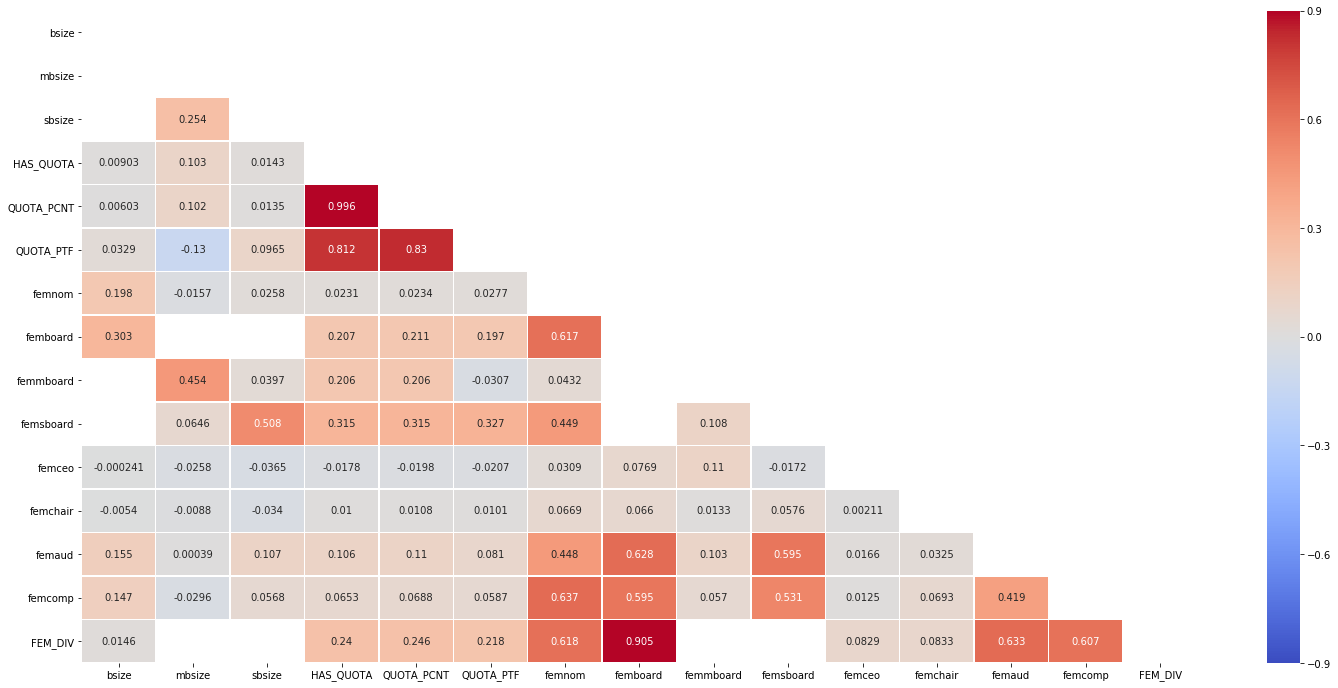

In [5]:
# Set a mask to avoid showing any NULL/NaN cells 
mask = df_corr.isnull()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25, 12))
sns.heatmap(
    df_corr, 
    xticklabels=df_corr.columns,
    yticklabels=df_corr.columns,
    vmin=-.9, 
    vmax=.9,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".3g",
    linewidths=.5
)

<a id='spreads'></a>
## Data Spread Information
[Return to Table of Contents](#top)

### Data spread for Female Director(s) on nomination committee (femnom).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DEA376BE0>]],
      dtype=object)

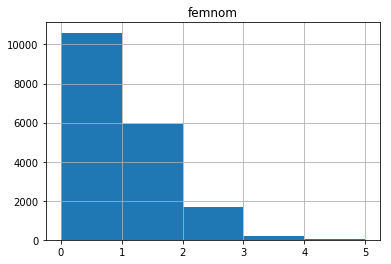

In [6]:
df_femnom = df_main[['femnom']].copy()
df_femnom['femnom'] = df_femnom['femnom']
df_femnom.hist(bins=5)

In [7]:
df_femnom['femnom'].value_counts()

0.0    10602
1.0     5946
2.0     1674
3.0      219
4.0       32
5.0        3
Name: femnom, dtype: int64

### Data spread for Female Director(s) on board (femboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DE26F3CC0>]],
      dtype=object)

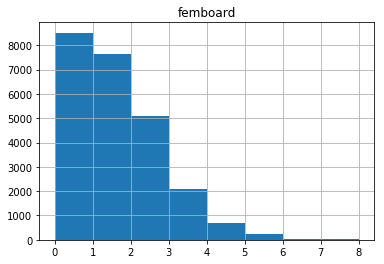

In [8]:
df_femboard = df_main[['femboard']].copy()
df_femboard['femboard'] = df_femboard['femboard']
df_femboard.hist(bins=8, range=(0,8))

In [9]:
df_femboard['femboard'].value_counts()

0.0    8517
1.0    7655
2.0    5088
3.0    2097
4.0     701
5.0     250
6.0      44
7.0      19
8.0       2
9.0       1
Name: femboard, dtype: int64

### Data spread for Female Director on Management Board (femmboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DE24E82E8>]],
      dtype=object)

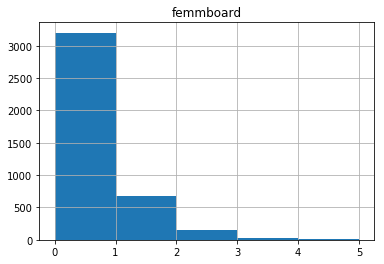

In [10]:
df_femmboard = df_main[['femmboard']].copy()
df_femmboard['femmboard'] = df_femmboard['femmboard']
df_femmboard.hist(bins=5, range=(0,5))

In [11]:
df_femmboard['femmboard'].value_counts()

0.0    3201
1.0     672
2.0     157
3.0      24
4.0       9
Name: femmboard, dtype: int64

### Data spread for Female Director on Supervisory Board (femsboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DF1E12470>]],
      dtype=object)

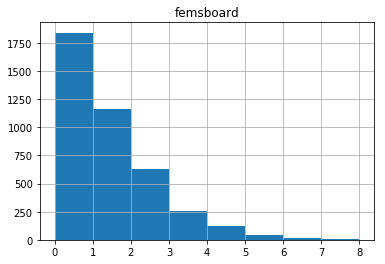

In [12]:
df_femsboard = df_main[['femsboard']].copy()
df_femsboard['femsboard'] = df_femsboard['femsboard']
df_femsboard.hist(bins=8)

In [13]:
df_femsboard['femsboard'].value_counts()

0.0    1841
1.0    1162
2.0     625
3.0     253
4.0     119
5.0      43
6.0      12
7.0       6
8.0       2
Name: femsboard, dtype: int64

### Data spread for Woman CEO (femceo).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DF1EB6C88>]],
      dtype=object)

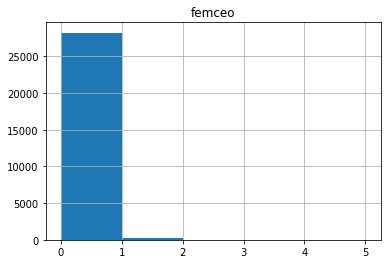

In [14]:
df_femceo = df_main[['femceo']].copy()
df_femceo['femceo'] = df_femceo['femceo']
df_femceo.hist(bins=5, range=(0,5))

In [15]:
df_femceo['femceo'].value_counts()

0    28221
1      216
Name: femceo, dtype: int64

### Data spread for Woman Chairperson (femchair).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DF2008048>]],
      dtype=object)

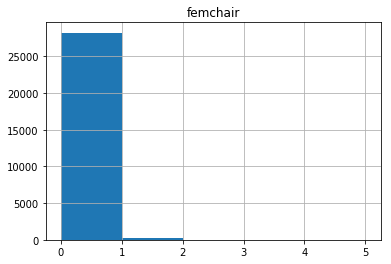

In [16]:
df_femchair = df_main[['femchair']].copy()
df_femchair['femchair'] = df_femchair['femchair']
df_femchair.hist(bins=5, range=(0,5))

In [17]:
df_femchair['femchair'].value_counts()

0    28233
1      203
2        1
Name: femchair, dtype: int64

### Data spread for Female Director(s) on audit committee (femaud).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DF1E57748>]],
      dtype=object)

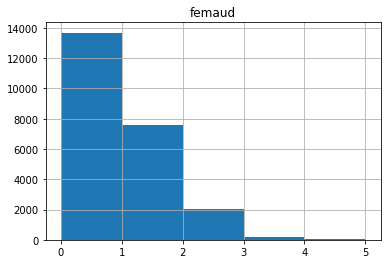

In [18]:
df_femaud = df_main[['femaud']].copy()
df_femaud['femaud'] = df_femaud['femaud']
df_femaud.hist(bins=5)

In [19]:
df_femaud['femaud'].value_counts()

0.0    13687
1.0     7572
2.0     2042
3.0      205
4.0       38
5.0        6
Name: femaud, dtype: int64

### Data spread for Female Director(s) on remuneration committee (femcomp).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DF1FAAA58>]],
      dtype=object)

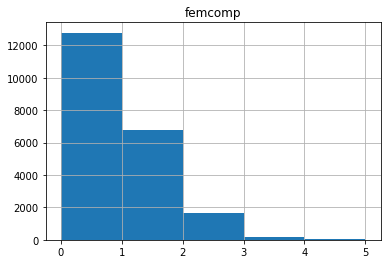

In [20]:
df_femcomp = df_main[['femcomp']].copy()
df_femcomp['femcomp'] = df_femcomp['femcomp']
df_femcomp.hist(bins=5)

In [21]:
df_femcomp['femcomp'].value_counts()

0.0    12773
1.0     6758
2.0     1674
3.0      191
4.0       21
5.0        3
Name: femcomp, dtype: int64

<a id='results'></a>
## Results Section
[Return to Table of Contents](#top)

## Notable: There appears to be a relationship between having women on the board and the board size. (One-Tier boards)

### In the regression below, we see an R-squared of 0.546 with a P-value of ~0.0 indicating a better-than-not likelihood that the size of the board is increased when a woman is added to the board. This seems to show a trend of adding a woman to the board as an n+1 (where n is the original board size) rather than maintaining the same n via replacing an existing member.

####  `Correlation: ~.303; R-Squared: 0.546; P-value: ~0.0; Observations: 24,374`

Trendline Equation: y=0.773802x+(8.414368)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bsize   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:34:37   Log-Likelihood:                -80572.
No. Observations:               24374   AIC:                         1.611e+05
Df Residuals:                   24373   BIC:                         1.612e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femboard       4.3616      0.025    171.207      0.000       4.312       4.412
==============================================================================
Omnibus:                      656.262   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.313
Skew:                          -0.221   Prob(JB):                    6.76e-258
Kurtosis:                       3.985   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

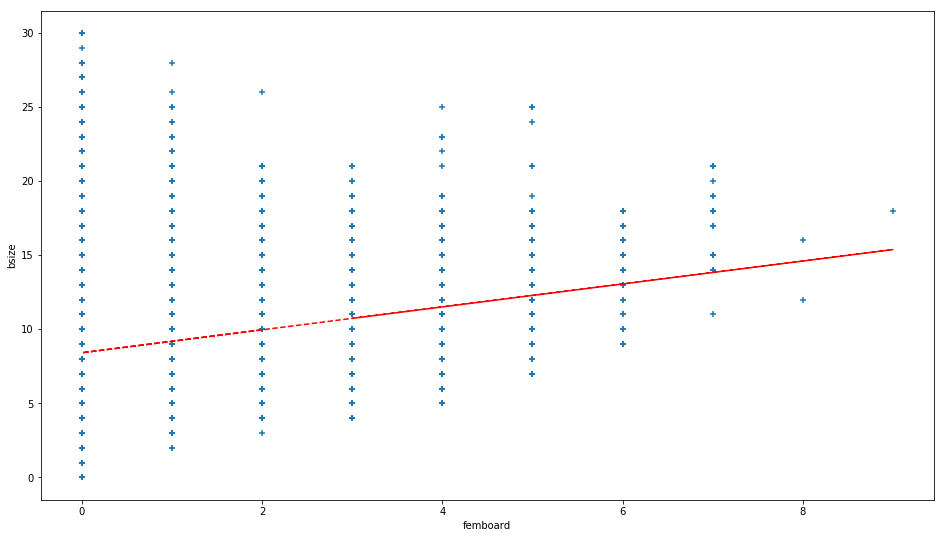

In [22]:
df_board_w_fem = df_main[['bsize', 'femboard']].copy()
df_board_w_fem['bsize'] = df_board_w_fem['bsize']
df_board_w_fem['femboard'] = df_board_w_fem['femboard']

df_board_w_fem = df_board_w_fem.dropna()

x = df_board_w_fem['femboard']
y = df_board_w_fem['bsize']

plt.figure(figsize = (16, 9))
plt.scatter(df_board_w_fem['femboard'], df_board_w_fem['bsize'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("bsize")
plt.xlabel("femboard")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be little to no relationship between having a quota for gender diversity on a board and the actual amount of women on the board. (One-Tier boards).

### Countries were coded if they had a quota (1) or not (0) and when the quota came into place.

#### `Correlation: ~0.207; R-Squared: 0.151; P-value: ~0.0; Observations: 24,374`

Trendline Equation: y=0.058838x+(0.057616)
Optimization terminated successfully.
         Current function value: 0.587411
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HAS_QUOTA   No. Observations:                24374
Model:                          Logit   Df Residuals:                    24373
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                 -0.5459
Time:                        12:37:44   Log-Likelihood:                -14318.
converged:                       True   LL-Null:                       -9261.4
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femboard      -0.6802      0.011    -60.134      0.000      -0.702      -0.658
==============================================================================
"""

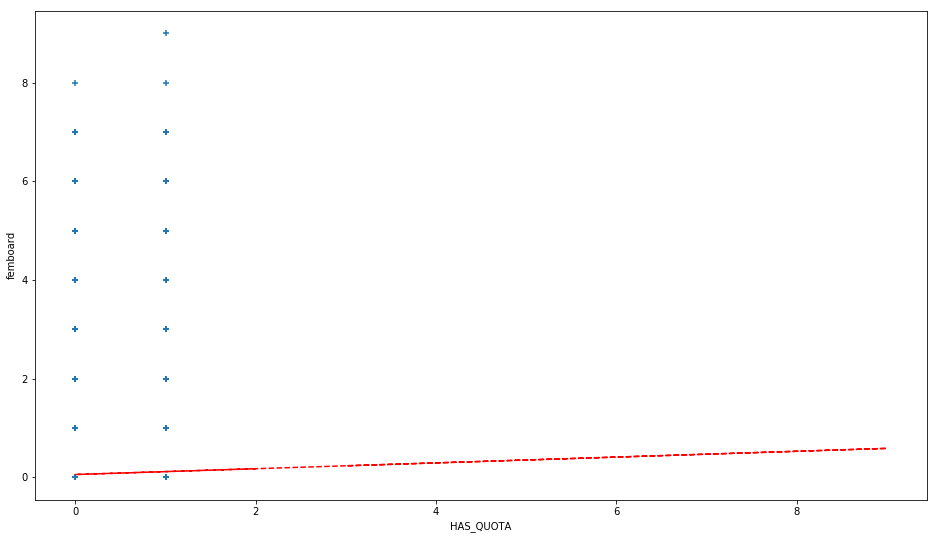

In [25]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'femboard']].copy()
df_quota_w_fem['HAS_QUOTA'] = df_quota_w_fem['HAS_QUOTA']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()
df_quota_w_fem = df_quota_w_fem[pd.notnull(df_quota_w_fem['HAS_QUOTA'])]
df_quota_w_fem = df_quota_w_fem[pd.notnull(df_quota_w_fem['femboard'])]

y = df_quota_w_fem['HAS_QUOTA']
x = df_quota_w_fem['femboard']

plt.figure(figsize = (16, 9))
plt.scatter(df_quota_w_fem['HAS_QUOTA'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("HAS_QUOTA")



#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()
model.summary()

## Notable: There appears to be little to no relationship between having a quota for gender diversity for PTFs on a board and the actual amount of women on the board. (One-Tier boards).

### Countries were coded if they had a quota for PTFs (1) or not (0) and when the quota came into place.

#### `Correlation: ~0.197; R-Squared: 0.119; P-value: ~0.0; Observations: 24,374`

Trendline Equation: y=0.048105x+(0.033449)
Optimization terminated successfully.
         Current function value: 0.542228
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              QUOTA_PTF   No. Observations:                24374
Model:                          Logit   Df Residuals:                    24373
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                 -0.7938
Time:                        13:05:05   Log-Likelihood:                -13216.
converged:                       True   LL-Null:                       -7367.9
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femboard      -0.8926      0.013    -66.771      0.000      -0.919      -0.866
==============================================================================
"""

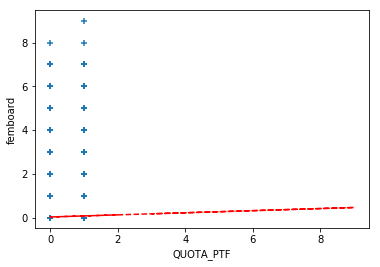

In [26]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'femboard']].copy()
df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

y = df_quota_w_fem['QUOTA_PTF']
x = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PTF'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PTF")

#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()
model.summary()

## There appears to be no relationship between having a quota for gender diversity on boards and the actual amount of women on the management board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: ~0.206; R-Squared: 0.095; P-value: ~0.0; Observations: 4,063`

Trendline Equation: y=0.104383x+(0.067390)
Optimization terminated successfully.
         Current function value: 0.663580
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HAS_QUOTA   No. Observations:                 4063
Model:                          Logit   Df Residuals:                     4062
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -1.106
Time:                        13:05:32   Log-Likelihood:                -2696.1
converged:                       True   LL-Null:                       -1280.1
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femmboard     -0.8883      0.065    -13.575      0.000      -1.017      -0.760
==============================================================================
"""

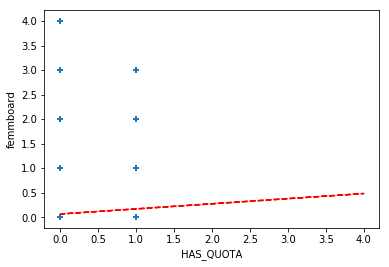

In [28]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'femmboard']].copy()
df_quota_w_femm['HAS_QUOTA'] = df_quota_w_femm['HAS_QUOTA']
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard']

df_quota_w_femm = df_quota_w_femm.dropna()

y = df_quota_w_femm['HAS_QUOTA']
x = df_quota_w_femm['femmboard']

plt.scatter(df_quota_w_femm['HAS_QUOTA'], df_quota_w_femm['femmboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femmboard")
plt.xlabel("HAS_QUOTA")

#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()

model.summary()

## There appears to be little to no relationship between having a quota for gender diversity on boards and the actual amount of women on the supervisory board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: 0.315; R-Squared: 0.183; P-value ~0.0; Observations: 4,063`

Trendline Equation: y=0.077231x+(0.019615)
Optimization terminated successfully.
         Current function value: 0.615313
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HAS_QUOTA   No. Observations:                 4063
Model:                          Logit   Df Residuals:                     4062
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                 -0.9529
Time:                        13:07:03   Log-Likelihood:                -2500.0
converged:                       True   LL-Null:                       -1280.1
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femsboard     -0.6240      0.029    -21.179      0.000      -0.682      -0.566
==============================================================================
"""

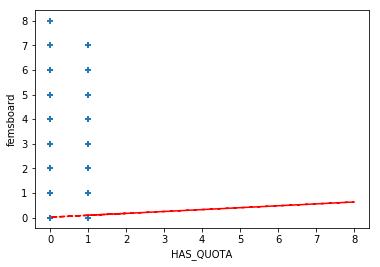

In [29]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'femsboard']].copy()
df_quota_w_fems['HAS_QUOTA'] = df_quota_w_fems['HAS_QUOTA']
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard']

df_quota_w_fems = df_quota_w_fems.dropna()

y = df_quota_w_fems['HAS_QUOTA']
x = df_quota_w_fems['femsboard']

plt.scatter(df_quota_w_fems['HAS_QUOTA'], df_quota_w_fems['femsboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femsboard")
plt.xlabel("HAS_QUOTA")

#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()

model.summary()

## Notable: There appears to be little to no relationship between having a quota for gender diversity for Publicly Traded Firms (PTFs) on a board and the actual amount of women on the board.

#### `Correlation: ~0.197; R-Squared: 0.119; P-value ~0.0; Observations: 24,374`

Trendline Equation: y=0.048105x+(0.033449)
Optimization terminated successfully.
         Current function value: 0.542228
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              QUOTA_PTF   No. Observations:                24374
Model:                          Logit   Df Residuals:                    24373
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                 -0.7938
Time:                        13:15:48   Log-Likelihood:                -13216.
converged:                       True   LL-Null:                       -7367.9
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femboard      -0.8926      0.013    -66.771      0.000      -0.919      -0.866
==============================================================================
"""

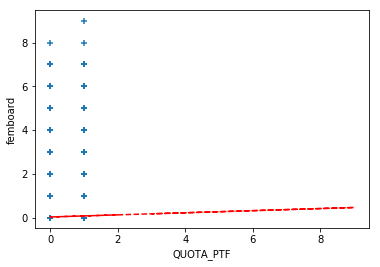

In [30]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'femboard']].copy()
df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

y = df_quota_w_fem['QUOTA_PTF']
x = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PTF'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PTF")

#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()

model.summary()

## There appears to be no relationship between having a quota for gender diversity for Publicly Traded Firms (PTFs) on a board and the amount of women on the management board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: ~-0.031; R-Squared: 0.004; P-value ~0.0; Observations: 4,063`

Trendline Equation: y=-0.011412x+(0.052051)
Optimization terminated successfully.
         Current function value: 0.582176
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              QUOTA_PTF   No. Observations:                 4063
Model:                          Logit   Df Residuals:                     4062
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -1.978
Time:                        13:15:56   Log-Likelihood:                -2365.4
converged:                       True   LL-Null:                       -794.30
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femmboard     -2.8448      0.164    -17.316      0.000      -3.167      -2.523
==============================================================================
"""

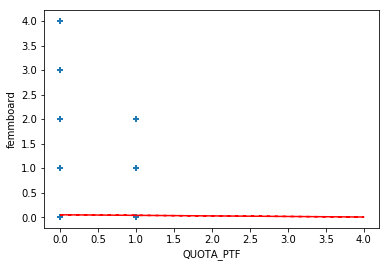

In [31]:
df_quota_w_femm = df_main[['QUOTA_PTF', 'femmboard']].copy()
df_quota_w_femm['QUOTA_PTF'] = df_quota_w_femm['QUOTA_PTF']
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard']

df_quota_w_femm = df_quota_w_femm.dropna()

y = df_quota_w_femm['QUOTA_PTF']
x = df_quota_w_femm['femmboard']

plt.scatter(df_quota_w_femm['QUOTA_PTF'], df_quota_w_femm['femmboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femmboard")
plt.xlabel("QUOTA_PTF")

#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()

model.summary()

## There appears to be little to no relationship between having a quota for gender diversity for Publicly Traded Firms (PTFs) and the amount of women on the supervisory board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: 0.327; R-Squared: 0.150; P-value ~0.0; Observations: 4,063`

Trendline Equation: y=0.058887x+(-0.008880)
Optimization terminated successfully.
         Current function value: 0.559538
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              QUOTA_PTF   No. Observations:                 4063
Model:                          Logit   Df Residuals:                     4062
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  -1.862
Time:                        13:16:06   Log-Likelihood:                -2273.4
converged:                       True   LL-Null:                       -794.30
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
femsboard     -0.9511      0.038    -24.892      0.000      -1.026      -0.876
==============================================================================
"""

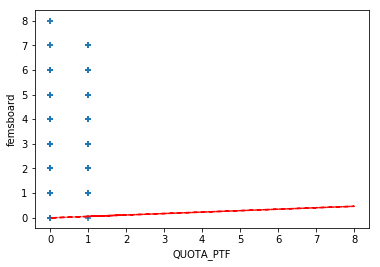

In [32]:
df_quota_w_fems = df_main[['QUOTA_PTF', 'femsboard']].copy()
df_quota_w_fems['QUOTA_PTF'] = df_quota_w_fems['QUOTA_PTF']
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard']

df_quota_w_fems = df_quota_w_fems.dropna()

y = df_quota_w_fems['QUOTA_PTF']
x = df_quota_w_fems['femsboard']

plt.scatter(df_quota_w_fems['QUOTA_PTF'], df_quota_w_fems['femsboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femsboard")
plt.xlabel("QUOTA_PTF")

#model = sm.OLS(y, x).fit()
model = sm.Logit(y, x).fit()
model.summary()

## Notable: There appears to be a relationship between those countries that do have quotas and the percentage of women on the board that the quota requires.

### In countries which have a quota, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota, companies only do what they can to fulfil it and nothing more.

#### `R-Squared: 0.630; P-value ~0.0; Observations: 3,087`

In [ ]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femboard']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['HAS_QUOTA'] == 1]

df_quota_w_fem['HAS_QUOTA'] = df_quota_w_fem['HAS_QUOTA']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PCNT'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be a relationship between those countries that do have quotas for PTFs and the percentage of women on the board of a PTF that the quota requires.

### In countries which have a quota for PTFs, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota for a PTF, companies only do what they can to fulfil it and nothing more.

#### `R-Squared: 0.627; P-value ~0.0; Observations: 2,191`

In [ ]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'QUOTA_PCNT', 'femboard']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['QUOTA_PTF'] == 1]

df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PCNT'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

## There appears a small but less significant relationship between those countries that do have quotas and the percentage of women on the management board that the quota requires. (Specifically relates to countries with two-tier board structures).

#### `R-Squared: 0.392; P-value ~0.0; Observations: 535`

In [ ]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femmboard']].copy()
df_quota_w_femm = df_quota_w_femm[df_quota_w_femm['HAS_QUOTA'] == 1]

df_quota_w_femm['HAS_QUOTA'] = df_quota_w_femm['HAS_QUOTA']
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard']

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PCNT']
y = df_quota_w_femm['femmboard']

plt.scatter(df_quota_w_femm['QUOTA_PCNT'], df_quota_w_femm['femmboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femmboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be a significant relationship between those countries that do have quotas and the percentage of women on the supervisory board that the quota requires. (Specifically relates to countries with two-tier board structures).

#### `R-Squared: 0.702; P-value ~0.0; Observations: 535`

In [ ]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femsboard']].copy()
df_quota_w_fems = df_quota_w_fems[df_quota_w_fems['HAS_QUOTA'] == 1]

df_quota_w_fems['HAS_QUOTA'] = df_quota_w_fems['HAS_QUOTA']
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard']

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['QUOTA_PCNT']
y = df_quota_w_fems['femsboard']

plt.scatter(df_quota_w_fems['QUOTA_PCNT'], df_quota_w_fems['femsboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femsboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

<a id='countries'></a>
# Diversity Information By Country
#### Assessments for: NOR; ESP; FIN; CAN; ISR; FRA; ITA; BEL
[Return to Table of Contents](#top)


<a id='quota_countries'></a>
### Quota countries with datapoint counts
|ISO-3|Datapoint Count|
|------|------|
|NOR|629|
|ESP|605|
|FIN|529|
|CAN|1180|
|ISR|63|
|FRA|1340|
|ITA|1014|
|BEL|446|


<a id='countries_tbl'></a>
### All countries by year with percentage of female board diversity (FEM_DIV: femboard / bsize)
[Return to Table of Contents](#top)

In [ ]:
df_fem_desc = df_main[['country', 'year', 'HAS_QUOTA', 'QUOTA_PTF', 'QUOTA_PCNT', 'FEM_DIV']]
df_fem_desc_grouped = df_fem_desc.groupby(['country', 'year', 'HAS_QUOTA', 'QUOTA_PTF', 'QUOTA_PCNT'])['FEM_DIV'].mean().reset_index()
#df_fem_desc_grouped.to_excel('year_over_year.xlsx', index=False)
df_fem_desc_grouped

<a id='quota_country_div'></a>
### Table of diversity for countries with quotas
[Return to Table of Contents](#top)

In [ ]:
quota_countries = ["NOR", "ESP", "FIN", "CAN", "ISR", "FRA", "ITA", "BEL"]

df_fem_desc_grouped_quotas = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'].isin(quota_countries)]

df_fem_desc_grouped_quotas

<a id='quota_graphs'></a>
## Graphs for firms with quotas for publicly traded firms
### Red line indicates year the quota legislation was passed

<a id='norway'></a>
### Norway
#### Legislation passed in 2003
[Return to Table of Contents](#top)

In [ ]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "NOR"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2003

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='spain'></a>
### Spain
#### Legislation passed in 2007
[Return to Table of Contents](#top)

In [ ]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "ESP"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2007

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='france'></a>
### France
#### Legislation passed in 2011
[Return to Table of Contents](#top)

In [ ]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "FRA"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2011

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='israel'></a>
### Israel
#### Legislation passed in 1999
#### Note: No compliance date or quota percentage was given. It was specified that one board seat went to a woman.
[Return to Table of Contents](#top)

In [ ]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "ISR"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 1999

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry


<a id='belgium'></a>
### Belgium
#### Legislation passed in 2011
[Return to Table of Contents](#top)

In [ ]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "BEL"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2011

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

[Return to Table of Contents](#top)